# Data analysis from 2D versus 3D.

In [3]:
# imports
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle # to load data from pickle file

In [4]:
root_dir = '/Users/agreic/Desktop/Project/Data/Raw/Baseline_Models/'
# load data
data = {}
for pickle_file in os.listdir(root_dir):
    filename = root_dir + pickle_file
    # TODO: Redo with validation set, then do for test set!
    if pickle_file.endswith('.pkl'):
        with open(filename, 'rb') as f:
            data[pickle_file[:-4]] = pickle.load(f)
            print(f'{pickle_file} loaded')

results_2D.pkl loaded
results_3D.pkl loaded


In [6]:
# Show head of data
for key in data.keys():
    print(f'{key}:\n{data[key].head()}')
    break

results_2D:
                                          Unnamed: 0  \
0       rf_model_0_50_gini_20_2_4_True_log2_None.pkl   
1  rf_model_0_10_log_loss_30_10_5_True_log2_None.pkl   
2  rf_model_0_20_log_loss_20_10_5_True_log2_None.pkl   
3  rf_model_0_20_log_loss_20_5_4_True_sqrt_balanc...   
4    rf_model_1_50_entropy_10_2_5_True_sqrt_None.pkl   

                                          model_name  accuracy  precision  \
0       rf_model_0_50_gini_20_2_4_True_log2_None.pkl  0.991948        1.0   
1  rf_model_0_10_log_loss_30_10_5_True_log2_None.pkl  0.991143        1.0   
2  rf_model_0_20_log_loss_20_10_5_True_log2_None.pkl  0.993559        1.0   
3  rf_model_0_20_log_loss_20_5_4_True_sqrt_balanc...  0.995169        1.0   
4    rf_model_1_50_entropy_10_2_5_True_sqrt_None.pkl  0.994364        1.0   

     recall   roc_auc                                    hyperparameters  
0  0.814815  0.999906  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...  
1  0.796296  0.999891  {'bootstrap': T

In [7]:
# Sort by roc_auc
sorted_data = {k: v.sort_values(by='roc_auc', ascending=False) for k, v in data.items()}

In [19]:
df2d = sorted_data['results_2D'].sort_values(by=['roc_auc','accuracy'],ascending=False)
df3d = sorted_data['results_3D'].sort_values(by=['roc_auc','accuracy'],ascending=False)

In [20]:
len(df2d), len(df3d)

(34560, 34560)

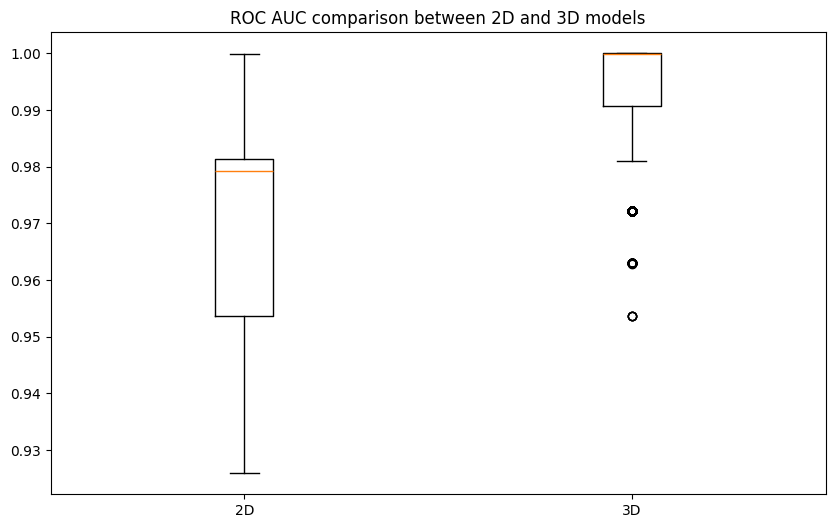

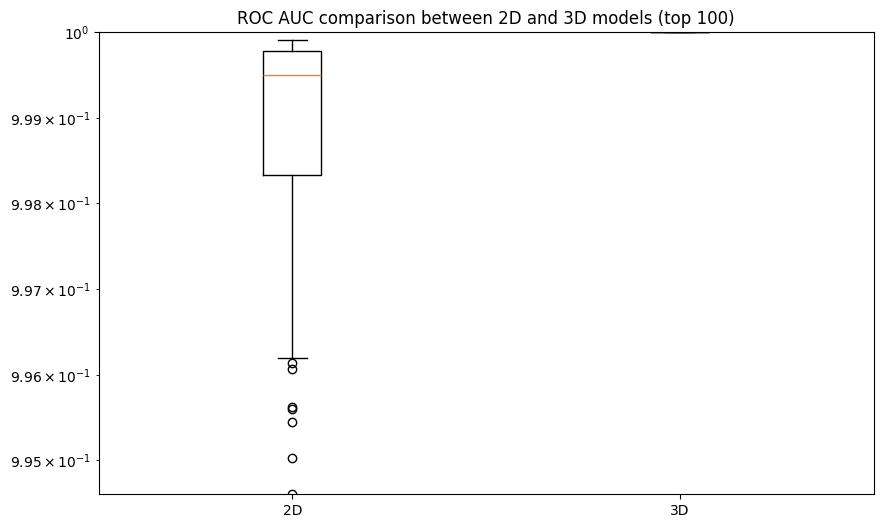

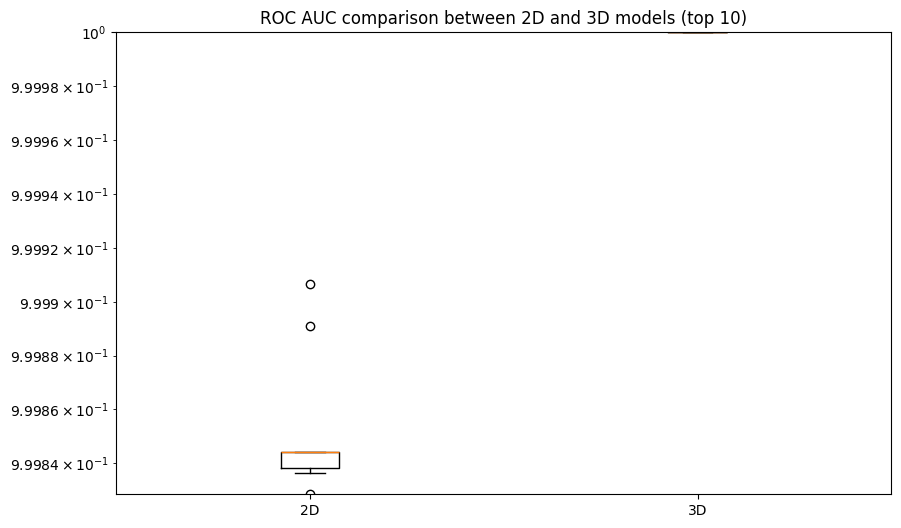

In [35]:
# Calculate statistic how well 3D models performs compared to 2D models

# Plot boxplots of results
plt.figure(figsize=(10,6))
plt.boxplot([df2d['roc_auc'], df3d['roc_auc']], tick_labels=['2D', '3D'])
plt.title('ROC AUC comparison between 2D and 3D models')
plt.show()

# Same for the top 100 models
df2d_top100 = df2d.head(100)
df3d_top100 = df3d.head(100)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top100['roc_auc'], df3d_top100['roc_auc']], tick_labels=['2D', '3D'])
plt.title('ROC AUC comparison between 2D and 3D models (top 100)')
plt.ylim(min(df2d_top100['roc_auc'].min(), df3d_top100['roc_auc'].min()), max(df2d_top100['roc_auc'].max(), df3d_top100['roc_auc'].max()))
plt.yscale('log')
plt.show()

# Same for top 10 models    
df2d_top10 = df2d.head(10)
df3d_top10 = df3d.head(10)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top10['roc_auc'], df3d_top10['roc_auc']], tick_labels=['2D', '3D'])
plt.title('ROC AUC comparison between 2D and 3D models (top 10)')
plt.ylim(min(df2d_top10['roc_auc'].min(), df3d_top10['roc_auc'].min()), max(df2d_top10['roc_auc'].max(), df3d_top10['roc_auc'].max()))
plt.yscale('log')
plt.show()


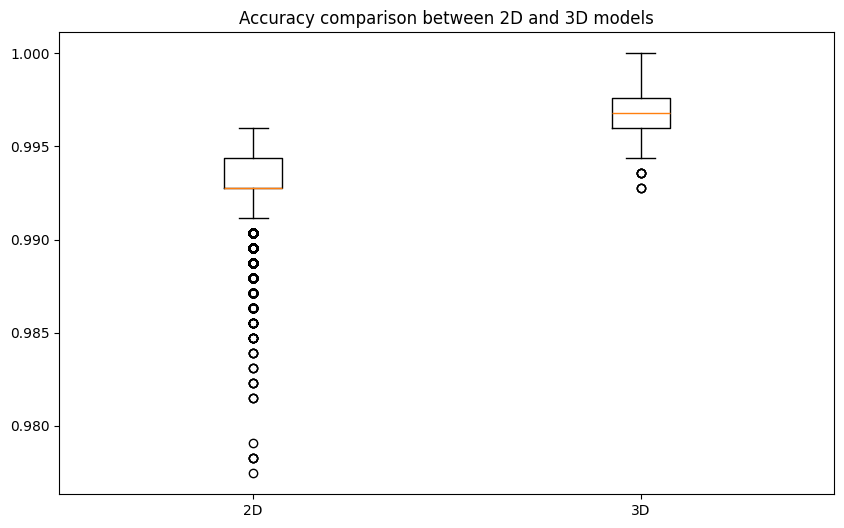

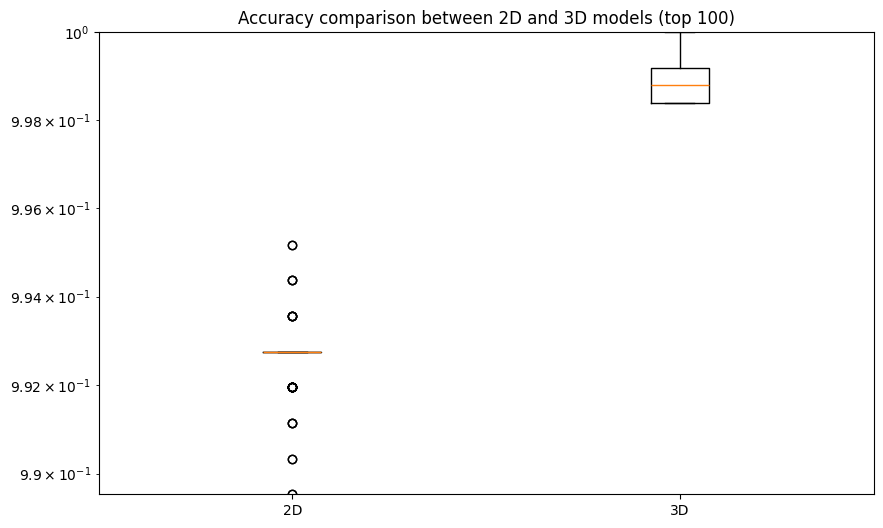

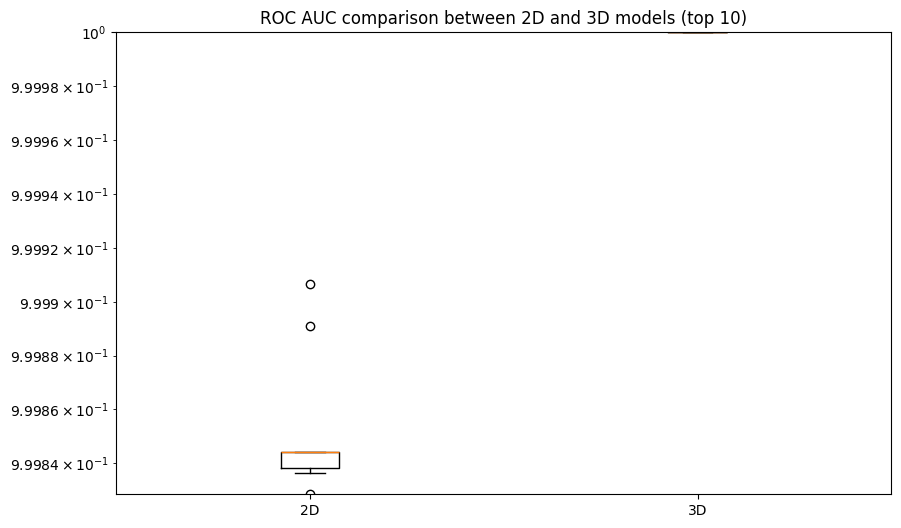

In [39]:
# Plot for accuracy
plt.figure(figsize=(10,6))
plt.boxplot([df2d['accuracy'], df3d['accuracy']], tick_labels=['2D', '3D'])
plt.title('Accuracy comparison between 2D and 3D models')
plt.show()

# Same for the top 100 models
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top100['accuracy'], df3d_top100['accuracy']], tick_labels=['2D', '3D'])
plt.title('Accuracy comparison between 2D and 3D models (top 100)')
plt.ylim(min(df2d_top100['accuracy'].min(), df3d_top100['accuracy'].min()), max(df2d_top100['accuracy'].max(), df3d_top100['accuracy'].max()))
plt.yscale('log')
plt.show()

# Same for top 10 models
df2d_top10 = df2d.head(10)
df3d_top10 = df3d.head(10)
plt.figure(figsize=(10,6))
plt.boxplot([df2d_top10['roc_auc'], df3d_top10['roc_auc']], tick_labels=['2D', '3D'])
plt.title('ROC AUC comparison between 2D and 3D models (top 10)')
plt.ylim(min(df2d_top10['roc_auc'].min(), df3d_top10['roc_auc'].min()), max(df2d_top10['roc_auc'].max(), df3d_top10['roc_auc'].max()))
plt.yscale('log')
plt.show()


## 3D models are better than 2D models.

In [42]:
# Print the best hyperparameters for 2D and 3D models
print(f'Best hyperparameters for 2D model:\n{df2d.head(1)['hyperparameters'].values[0]}')
print(f'Best hyperparameters for 3D model:\n{df3d.head(1)['hyperparameters'].values[0]}')


Best hyperparameters for 2D model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Best hyperparameters for 3D model:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [52]:
# The model_name follows this convention:  model_name = f'rf_model_{index}_{n_estimators}_{criterion}_{max_depth}_{min_samples_split}_{min_samples_leaf}_{bootstrap}_{max_features}_{class_weight}.pkl'
# The best model is the first one in the sorted dataframe
best_model = df3d.head(1)['model_name'].values[0]
best_model_path = root_dir + best_model
best_model_path

# Load the best model
with open(best_model_path, 'rb') as f:
    best_model = pickle.load(f)